**HANDS ON - text2graphAPI**

text2graphapi is a python library for text-to-graph tranformations.

To use this library it is necessary to install the modules and dependencies in the user’s application

The corpus of text documents to be transformed into graphs has to be loaded/read previously.

More infomation: https://pypi.org/project/text2graphapi/

**Installation**

In [ ]:
!pip  install text2graphapi

***Corpus - Text Documents***

In [ ]:
# INPUT STRUCTURE
'''
[
  {
    'id':   1,             (int)
    'doc': "text content"  (string)
  },
  {
    'id':   2,
    'doc': "text content"
  },
  ...
]
'''

In [ ]:
# TESTING DOC CORPUS
corpus_ENG = [
    {'id': 1, 'doc': "Artificial Intelligence is the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings"},
    {'id': 2, 'doc': "Natural language processing refers to the branch of computer science that focus on the ability of computers to understand text and spoken words in much the same way human beings can"},
    {'id': 3, 'doc': "Authorship verification is the task of deciding whether two texts have been written by the same author based on comparing the texts' writing styles"},
    {'id': 4, 'doc': "Feature extraction refers to the process of transforming raw data into numerical features "},
    {'id': 5, 'doc': "A graph neural network is a class of artificial neural networks for processing data that can be represented as graphs."},
]

***Co-Ocurrence Graph***

In [ ]:
import networkx as nx
from text2graphapi.src.Cooccurrence import Cooccurrence

to_cooccurrence_graph = Cooccurrence(
                graph_type = 'DiGraph', # Graph, DiGraph
                apply_prep = True,
                parallel_exec = False,
                window_size = 2,
                language = 'en', # sp, en, fr
                output_format = 'networkx', # networkx, adj_matrix
                steps_preprocessing = { }
            )

output_cocc_text_graphs = to_cooccurrence_graph.transform(corpus_ENG)


INFO:text2graphapi.src.Preprocessing:Has already installed spacy model en_core_web_sm
INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 5 text documents...
INFO:text2graphapi.src.Cooccurrence:Done transformations


In [ ]:
# GRAPH OUPUT STRUCTURE
'''
[
  {
    'doc_id': 1,              (int)
    'graph': graph_output,    (networkx, adjacency_matrix, etc)
    'number_of_edges': 21,    (int)
    'number_of_nodes': 12,    (int)
    'status': 'success'       (success/fail)
  },
  ...
]
'''

for g in output_cocc_text_graphs:
  print(g)

{'doc_id': 1, 'graph': <networkx.classes.digraph.DiGraph object at 0x7c0654402020>, 'number_of_edges': 21, 'number_of_nodes': 12, 'status': 'success'}
{'doc_id': 2, 'graph': <networkx.classes.digraph.DiGraph object at 0x7c0654400460>, 'number_of_edges': 29, 'number_of_nodes': 16, 'status': 'success'}
{'doc_id': 3, 'graph': <networkx.classes.digraph.DiGraph object at 0x7c0654402560>, 'number_of_edges': 21, 'number_of_nodes': 11, 'status': 'success'}
{'doc_id': 4, 'graph': <networkx.classes.digraph.DiGraph object at 0x7c0654403670>, 'number_of_edges': 15, 'number_of_nodes': 9, 'status': 'success'}
{'doc_id': 5, 'graph': <networkx.classes.digraph.DiGraph object at 0x7c06544035e0>, 'number_of_edges': 19, 'number_of_nodes': 10, 'status': 'success'}


In [ ]:
# NODES INFO
graph_nodes = output_cocc_text_graphs[0]['graph'].nodes(data=True)
print("NODES and WEIGHTS")
print("Total nodes: ", len(graph_nodes))
for node in graph_nodes:
  print(node)


NODES and WEIGHTS
Total nodes:  12
('artificial', {'pos_tag': 'ADJ'})
('intelligence', {'pos_tag': 'NOUN'})
('ability', {'pos_tag': 'NOUN'})
('digital', {'pos_tag': 'ADJ'})
('computer', {'pos_tag': 'NOUN'})
('controlled', {'pos_tag': 'VERB'})
('robot', {'pos_tag': 'NOUN'})
('perform', {'pos_tag': 'NOUN'})
('tasks', {'pos_tag': 'NOUN'})
('commonly', {'pos_tag': 'ADV'})
('intelligent', {'pos_tag': 'ADJ'})
('beings', {'pos_tag': 'NOUN'})


In [ ]:
# EDGES INFO
graph_edges = output_cocc_text_graphs[0]['graph'].edges(data=True)
print("EDGES and WEIGHTS")
print("Total Edges: ", len(graph_edges))
for edge in graph_edges:
  print(edge)

EDGES and WEIGHTS
Total Edges:  21
('artificial', 'intelligence', {'freq': 1})
('artificial', 'ability', {'freq': 1})
('intelligence', 'ability', {'freq': 1})
('intelligence', 'digital', {'freq': 1})
('ability', 'digital', {'freq': 1})
('ability', 'computer', {'freq': 1})
('digital', 'computer', {'freq': 2})
('computer', 'computer', {'freq': 1})
('computer', 'controlled', {'freq': 2})
('computer', 'robot', {'freq': 1})
('controlled', 'robot', {'freq': 1})
('controlled', 'perform', {'freq': 1})
('robot', 'perform', {'freq': 1})
('robot', 'tasks', {'freq': 1})
('perform', 'tasks', {'freq': 1})
('perform', 'commonly', {'freq': 1})
('tasks', 'commonly', {'freq': 1})
('tasks', 'intelligent', {'freq': 1})
('commonly', 'intelligent', {'freq': 1})
('commonly', 'beings', {'freq': 1})
('intelligent', 'beings', {'freq': 1})


**Heterogeneous Graphs**

In [ ]:
# TESTING DOC CORPUS
corpus_FRE = [
    {'id': 1, "doc": "Par suite de l'attraction considérable que les villes exercent sur les campagnes les questions ouvrières industrielles ont chez nous une importance considérable"},    {'id': 2, "doc": "Aujourd’hui tous les esprits éclairés reconnaissent la nécessité de l’instruction technique depuis que les sciences ont pris le pas sur les lettres "},
    {'id': 3, "doc": "La Révolution après avoir supprimé les corporations de l’ancien régime comprit la nécessité d’établir un large enseignement industriel"},
    {'id': 4, "doc": "les établissements où on les a introduites sont peu nombreuxet pour leur création on n’a pas suivi un plan nettement arrêtéaussi les essais tentés ont ététiniidesou infructueux"},
    {'id': 5, "doc": "La loi du 11 décembre 1880 a placé les écoles manuellés d’apprentissage au nombre des établissements d’enseignement"}
]

In [ ]:
from text2graphapi.src.Heterogeneous import Heterogeneous

to_hetero_graph = Heterogeneous(
        window_size = 20,
        graph_type = 'Graph',
        parallel_exec = False,
        apply_prep = True,
        load_preprocessing = False,
        language = 'fr', #es, en, fr
        output_format = 'networkx',
        steps_preprocessing = {
            'handle_blank_spaces': True,
            'handle_non_ascii': True,
            'handle_emoticons': True,
            'handle_html_tags': True,
            'handle_negations': True,
            'handle_contractions': True,
            'handle_stop_words': True,
            'to_lowercase': True
        },
    )

output_hetero_text_graphs = to_hetero_graph.transform(corpus_FRE)


INFO:text2graphapi.src.Preprocessing:Has already installed spacy model fr_core_news_sm
INFO:text2graphapi.src.Heterogeneous:Init transformations: Text to Heterogeneous Graph
INFO:text2graphapi.src.Heterogeneous:Transforming 5 text documents...
INFO:text2graphapi.src.Heterogeneous:Done transformations


In [ ]:
# GRAPH OUPUT STRUCTURE
for g in output_hetero_text_graphs:
  print(g)

{'doc_id': 1, 'graph': <networkx.classes.graph.Graph object at 0x7c065482e0b0>, 'number_of_edges': 386, 'number_of_nodes': 60, 'status': 'success'}


In [ ]:
# NODES INFO

graph_nodes_hetero = output_hetero_text_graphs[0]['graph'].nodes
print("NODES and WEIGHTS")
print("Total nodes: ", len(graph_nodes_hetero))
graph_nodes_hetero
for node in list(graph_nodes_hetero)[:15]:
  print(node)

NODES and WEIGHTS
Total nodes:  60
D-1
suite
attraction
consid
rable
villes
exercent
campagnes
questions
ouvri
res
industrielles
importance
D-2
esprits


In [ ]:
graph_edges_hetero = output_hetero_text_graphs[0]['graph'].edges(data=True)
print("EDGES and WEIGHTS")
print("Total Edges: ", len(graph_edges_hetero))
for edge in list(graph_edges_hetero)[:20]:
  print(edge)

EDGES and WEIGHTS
Total Edges:  386
('D-1', 'campagnes', {'tfidf': 2.61})
('D-1', 'consid', {'tfidf': 5.22})
('D-1', 'villes', {'tfidf': 2.61})
('D-1', 'rable', {'tfidf': 5.22})
('D-1', 'ouvri', {'tfidf': 2.61})
('D-1', 'attraction', {'tfidf': 2.61})
('D-1', 'res', {'tfidf': 2.61})
('D-1', 'questions', {'tfidf': 2.61})
('D-1', 'importance', {'tfidf': 2.61})
('D-1', 'industrielles', {'tfidf': 2.61})
('D-1', 'exercent', {'tfidf': 2.61})
('D-1', 'suite', {'tfidf': 2.61})
('suite', 'attraction', {'pmi': 1.61})
('suite', 'consid', {'pmi': 1.61})
('suite', 'rable', {'pmi': 1.61})
('suite', 'villes', {'pmi': 1.61})
('suite', 'exercent', {'pmi': 1.61})
('suite', 'campagnes', {'pmi': 1.61})
('suite', 'questions', {'pmi': 1.61})
('suite', 'ouvri', {'pmi': 1.61})


**PLOTTING A GRAPH**

('Artificial Intelligence is the ability of a digital computer or '
 'computer-controlled robot to perform tasks commonly associated with '
 'intelligent beings')


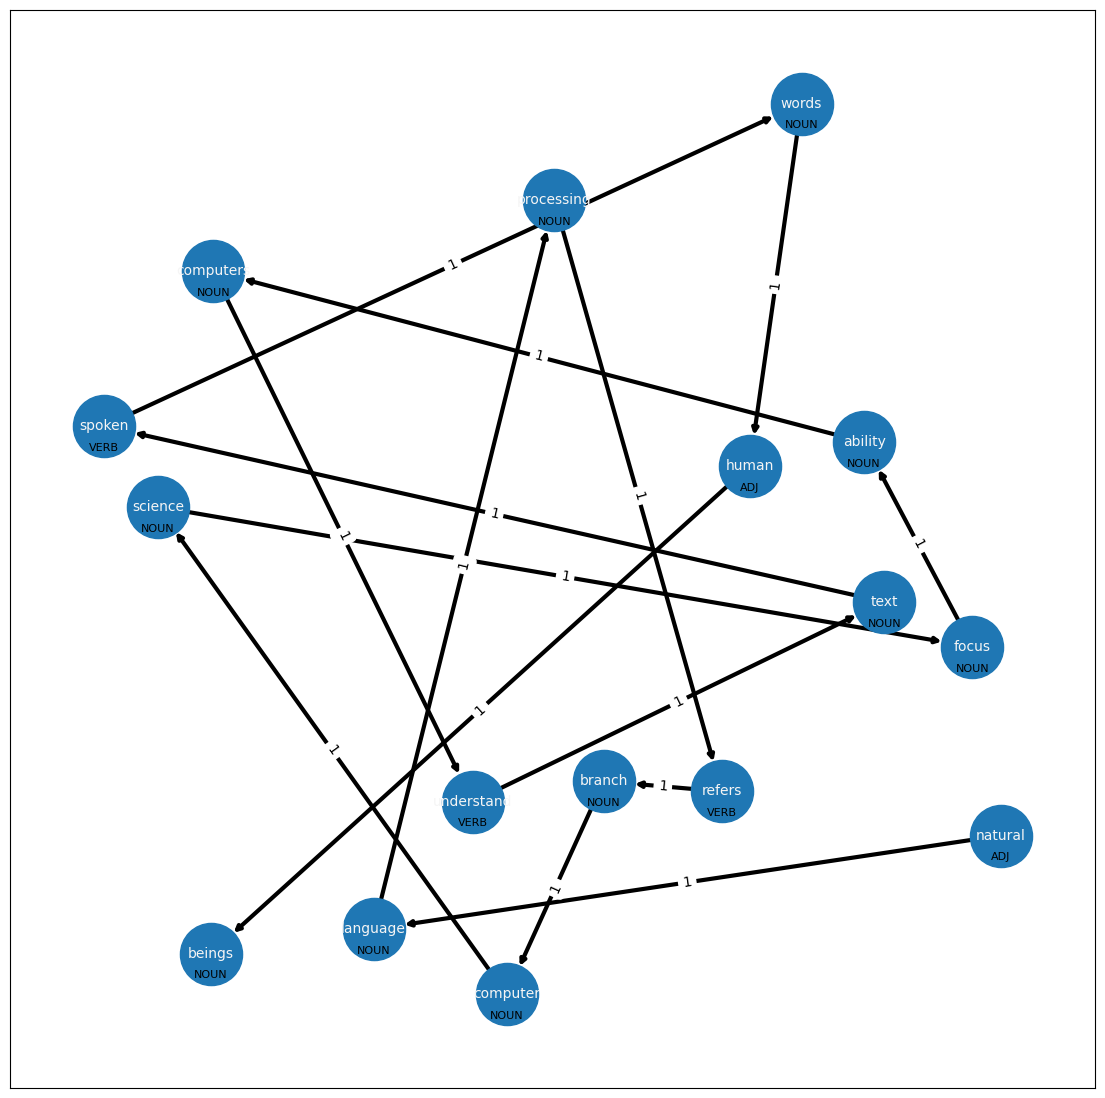

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint

pprint(corpus_ENG[0]['doc'])

G = output_cocc_text_graphs[1]['graph']
options = {
    'node_color': 'tab:blue',
    'node_size': 2000,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 8,

}

#labels = nx.get_node_attributes(G, 'pos_tag')
pos = nx.random_layout(G)
plt.figure(4,figsize=(14,14))

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 0.02)

node_attrs = nx.get_node_attributes(G, 'pos_tag')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr

edge_labels = nx.get_edge_attributes(G,'freq')

nx.draw_networkx(G, pos, arrows=True, with_labels=True, font_size='10', font_color="whitesmoke", **options)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_size='8')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [ ]:
def format_vertical_headers(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '5px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'),
                          ('height', '10px'),
                          ('vertical-align', 'bottom')])]
    return (df.fillna('').style.set_table_styles(styles))

A = nx.adjacency_matrix(G)
#print(A.todense(), '\n\n\n\n')
df = nx.to_pandas_adjacency(G)

for i in df.columns:
    try:
        df[[i]] = df[[i]].astype(float).astype(int)
    except:
        pass

def highlight_cols(s):
    color = 'blue'
    return 'color: %s' % color

df.style.applymap(highlight_cols)

format_vertical_headers(df)

,natural,language,processing,refers,branch,computer,science,focus,ability,computers,understand,text,spoken,words,human,beings
natural,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
language,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
processing,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
refers,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
branch,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
computer,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
science,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
focus,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
computers,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**TESTING**

In [ ]:
graph = output_text_graphs[0]['graph']

graph.nodes


NodeView((The, violence, on, the, TV, ., The, article, discussed, the, idea, of, the, amount, of, violence, on, the, news, 'T', 'h', 'e', ' ', 'v', 'i', 'o', 'l', 'n', 'c', 't', 'V', '.', 'a', 'r', 'd', 's', 'u', 'f', 'm', 'w'))

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

#nx.draw(graph, with_labels = True)
#plt.savefig("filename.png")

def format_vertical_headers(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '5px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'),
                          ('height', '10px'),
                          ('vertical-align', 'bottom')])]
    return (df.fillna('').style.set_table_styles(styles))


In [ ]:
nodes =[('violence', {'pos_tag': 'NOUN'}), ('tv', {'pos_tag': 'NOUN'}), ('article', {'pos_tag': 'NOUN'}), ('discussed', {'pos_tag': 'VERB'}), ('idea', {'pos_tag': 'NOUN'}), ('amount', {'pos_tag': 'NOUN'}), ('violence', {'pos_tag': 'NOUN'}), ('news', {'pos_tag': 'NOUN'})]
edges = [('violence', 'tv', {'freq': 1}), ('violence', 'article', {'freq': 1}), ('violence', 'discussed', {'freq': 1}), ('tv', 'article', {'freq': 1}), ('tv', 'discussed', {'freq': 1}), ('tv', 'idea', {'freq': 1}), ('article', 'discussed', {'freq': 1}), ('article', 'idea', {'freq': 1}), ('article', 'amount', {'freq': 1}), ('discussed', 'idea', {'freq': 1}), ('discussed', 'amount', {'freq': 1}), ('discussed', 'violence', {'freq': 1}), ('idea', 'amount', {'freq': 1}), ('idea', 'violence', {'freq': 1}), ('idea', 'news', {'freq': 1}), ('amount', 'violence', {'freq': 1}), ('amount', 'news', {'freq': 1}), ('violence', 'news', {'freq': 1})]

G = nx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)
print('nodes:', G.nodes)
print('edges:', G.edges)

A = nx.adjacency_matrix(G)
print(A.todense(), '\n\n\n\n')
df = nx.to_pandas_adjacency(G)

for i in df.columns:
    try:
        df[[i]] = df[[i]].astype(float).astype(int)
    except:
        pass



def highlight_cols(s):
    color = 'blue'
    return 'color: %s' % color

df.style.applymap(highlight_cols)

format_vertical_headers(df)

nodes: ['violence', 'tv', 'article', 'discussed', 'idea', 'amount', 'news']
edges: [('violence', 'tv'), ('violence', 'article'), ('violence', 'discussed'), ('violence', 'news'), ('tv', 'article'), ('tv', 'discussed'), ('tv', 'idea'), ('article', 'discussed'), ('article', 'idea'), ('article', 'amount'), ('discussed', 'idea'), ('discussed', 'amount'), ('discussed', 'violence'), ('idea', 'amount'), ('idea', 'violence'), ('idea', 'news'), ('amount', 'violence'), ('amount', 'news')]
[[0 1 1 1 0 0 1]
 [0 0 1 1 1 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 0 1 1 0]
 [1 0 0 0 0 1 1]
 [1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]] 






,violence,tv,article,discussed,idea,amount,news
violence,0,1,1,1,0,0,1
tv,0,0,1,1,1,0,0
article,0,0,0,1,1,1,0
discussed,1,0,0,0,1,1,0
idea,1,0,0,0,0,1,1
amount,1,0,0,0,0,0,1
news,0,0,0,0,0,0,0


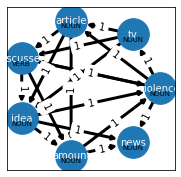

In [ ]:
options = {
    'node_color': 'tab:blue',
    'node_size': 1000,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 8,

}
#labels = nx.get_node_attributes(G, 'pos_tag')
pos = nx.circular_layout(G)
plt.figure(3,figsize=(3,3))

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 0.07)

node_attrs = nx.get_node_attributes(G, 'pos_tag')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr

edge_labels = nx.get_edge_attributes(G,'freq')

nx.draw_networkx(G, pos, arrows=True, with_labels=True, font_size='10', font_color="whitesmoke", **options)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_size='7')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

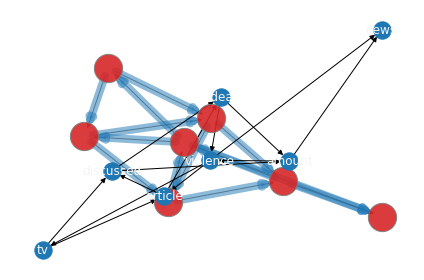

In [ ]:
# nodes
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_color="tab:red", **options)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=G.edges,
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


nx.draw_networkx(G, arrows=True, with_labels=True, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

## **OneGraph Representation**

In [ ]:
# MODULOES
import sys
import random
import nltk
from math import log
import scipy.sparse as sp
from google.colab import drive
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np


In [ ]:
# MOUNT DRIVE
drive.mount('/content/drive')
PATH_TO_DRIVE = '/content/drive/MyDrive/'
sys.path.append(PATH_TO_DRIVE + 'Docto/datasets/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DATASET
dataset_path = PATH_TO_DRIVE + 'Docto/datasets/'
dataset = '20ng'
dir_dataset = dataset_path + dataset + '/'

In [ ]:
# GLOBAL VARIABLES
word_embeddings_dim = 300
word_vector_map = {}


In [ ]:
# vars
doc_name_list = []
doc_train_list = []
doc_test_list = []
doc_content_list = []

# get doc_name_list, doc_train_list, doc_test_list
f = open(dir_dataset + dataset + '_reduce.txt', 'r+')
lines = f.readlines()
for line in lines[:]:
    doc_name_list.append(line.strip())
    temp = line.split("\t")
    if temp[1].find('test') != -1:
        doc_test_list.append(line.strip())
    elif temp[1].find('train') != -1:
        doc_train_list.append(line.strip())
f.close()

# get doc_content_list
f = open(dir_dataset + dataset + '_reduce.clean.txt', 'r')
lines = f.readlines()
for line in lines:
    doc_content_list.append(line.strip())
f.close()


# print info
print('doc_name_list -> ', 'len: ', len(doc_name_list), '| content: ', doc_name_list[0])
print('doc_train_list -> ', 'len: ', len(doc_train_list), '| content: ', doc_train_list[0])
print('doc_test_list -> ', 'len: ', len(doc_test_list), '| content: ', doc_test_list[0])
print('doc_content_list -> ', 'len: ', len(doc_content_list), '| content: ', doc_content_list[0])


doc_name_list ->  len:  1798 | content:  20ng/20news-bydate-test/alt.atheism/53068	20news-bydate-test	alt.atheism
doc_train_list ->  len:  1080 | content:  20ng/20news-bydate-train/alt.atheism/49960	20news-bydate-train	alt.atheism
doc_test_list ->  len:  718 | content:  20ng/20news-bydate-test/alt.atheism/53068	20news-bydate-test	alt.atheism
doc_content_list ->  len:  1798 | content:  decay cbnewsj cb att com \( dean kaflowitz \) subject bible answers organization distribution na lines 18 article healta 153 saturn wwc edu , healta saturn wwc edu \( tammy r healy \) writes 12 \) 2 god said make image , refering idols , created worshipped n't high priest could enter holy kept year , day familiar , knowledgeable original language , believe word would used word instead image original said think 're wrong , could suggesting way determine whether interpretation offer correct dean kaflowitz


In [ ]:
# vars
train_ids = []
test_ids = []

cnt = 0
# get train_ids and test_name
for train_name in doc_train_list:
    train_id = doc_name_list.index(train_name)
    train_ids.append(train_id)
    '''if cnt == 5:
      break
    print(train_name, train_ids)
    cnt += 1'''

random.shuffle(train_ids)

for test_name in doc_test_list:
    test_id = doc_name_list.index(test_name)
    test_ids.append(test_id)
    '''if cnt == 5:
      break
    print(test_name, test_ids)
    cnt += 1'''

random.shuffle(test_ids)

# get total ids
ids = train_ids + test_ids

# print info
print('train_ids -> ', 'len: ', len(train_ids), '| content: ', train_ids[0])
print('test_ids -> ', 'len: ', len(test_ids), '| content: ', test_ids[0])


train_ids ->  len:  1080 | content:  1479
test_ids ->  len:  718 | content:  1048


In [ ]:
# vars
shuffle_doc_name_list = []
shuffle_doc_words_list = []

# shuffle_doc_name_list and shuffle_doc_words_list
for id in ids:
    shuffle_doc_name_list.append(doc_name_list[int(id)])
    shuffle_doc_words_list.append(doc_content_list[int(id)])

# print info
print('shuffle_doc_name_list -> ', 'len: ', len(shuffle_doc_name_list), '| content: ', shuffle_doc_name_list[0])
print('shuffle_doc_words_list -> ', 'len: ', len(shuffle_doc_words_list), '| content: ', shuffle_doc_words_list[0])


shuffle_doc_name_list ->  len:  1798 | content:  20ng/20news-bydate-train/rec.sport.hockey/53681	20news-bydate-train	rec.sport.hockey
shuffle_doc_words_list ->  len:  1798 | content:  filinuk staff dccs upenn edu \( geoff filinuk \) subject get real caps chance reply filinuk staff dccs upenn edu \( geoff filinuk \) organization university pennsylvania lines 7 nntp posting host staff dccs upenn edu anyone really believes caps beat pens kidding pens may loose one game playoffs geoff filinuk flyers fan


In [ ]:
# vars
word_freq = {}
word_set = set()
cnt = 0

# build vocab
for doc_words in shuffle_doc_words_list:
    words = doc_words.split()
    for word in words:
        word_set.add(word)
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

vocab = list(word_set)
vocab_size = len(vocab)

# print info
print('vocab -> ', 'len: ', len(vocab), '| content: ', vocab[0])
print('word_freq -> ', 'len: ', len(word_freq), '| content: ', word_freq['danny'], ', ', word_freq.keys())


vocab ->  len:  8590 | content:  peace
word_freq ->  len:  8590 | content:  11 ,  dict_keys(['filinuk', 'staff', 'dccs', 'upenn', 'edu', '\\(', 'geoff', '\\)', 'subject', 'get', 'real', 'caps', 'chance', 'reply', 'organization', 'university', 'pennsylvania', 'lines', '7', 'nntp', 'posting', 'host', 'anyone', 'really', 'believes', 'beat', 'pens', 'kidding', 'may', 'loose', 'one', 'game', 'playoffs', 'flyers', 'fan', 'patrick', 'c', 'leger', 'pl1u', 'andrew', 'cmu', 'thoughts', 'christians', 'sophomore', ',', 'electrical', 'computer', 'engineering', 'carnegie', 'mellon', 'pittsburgh', 'pa', '51', 'portal', 'hq', 'videocart', 'com', 'netnews', 'alt', 'atheism', '15', 'apr', '93', 'dave', 'fuller', "i'm", 'sick', 'religious', 'types', 'looked', 'worst', 'atheists', 'must', 'end', 'sight', 'think', "'d", 'help', 'got', 'couple', 'good', 'even', 'agnostics', 'high', 'political', 'offices', 'last', 'time', 'atheist', 'president', '\\?', 'ever', "n't", 'actually', 'know', 'questions', 'supreme

In [ ]:
# vars
word_test = 'apple'
word_doc_list = {}
word_doc_freq = {}
word_id_map = {}
cnt = 0

# get word_doc_list
for i in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    appeared = set()
    for word in words:
        if word in appeared:
            continue
        if word in word_doc_list:
            doc_list = word_doc_list[word]
            doc_list.append(i)
            word_doc_list[word] = doc_list
        else:
            word_doc_list[word] = [i]
        appeared.add(word)

        #if word == word_test':
        #  print('***', i, word_doc_list[word_test])

# get word_doc_freq
for word, doc_list in word_doc_list.items():
    word_doc_freq[word] = len(doc_list)

# get word_id_map
for i in range(vocab_size):
    word_id_map[vocab[i]] = i
    #if vocab[i] == word_test:
    #  print(word_id_map[vocab[i]], vocab[i], i)

# print info
print('word_doc_list -> ', 'len: ', len(word_doc_list), '| word_test: ', word_test, len(word_doc_list[word_test]), word_doc_list[word_test])
print('word_doc_freq -> ', 'len: ', len(word_doc_freq), '| word_test: ', word_test, word_doc_freq[word_test])
print('word_id_map -> ', 'len: ', len(word_id_map), '| word_test: ', word_test, word_id_map[word_test])


word_doc_list ->  len:  8590 | word_test:  apple 59 [38, 46, 142, 146, 148, 150, 178, 218, 219, 228, 257, 380, 420, 481, 501, 542, 545, 561, 571, 577, 710, 723, 732, 768, 772, 901, 911, 965, 974, 986, 996, 1143, 1149, 1173, 1179, 1256, 1280, 1283, 1330, 1344, 1373, 1420, 1441, 1454, 1471, 1479, 1506, 1511, 1547, 1549, 1551, 1559, 1604, 1612, 1631, 1664, 1669, 1689, 1721]
word_doc_freq ->  len:  8590 | word_test:  apple 59
word_id_map ->  len:  8590 | word_test:  apple 7459


In [ ]:
# x: feature vectors of training docs, no initial features
# tx: feature vectors of test docs, no initial features

# slect 90% training set
train_size = len(train_ids)
val_size = int(0.1 * train_size)
real_train_size = train_size - val_size  # - int(0.5 * train_size)

# tx: feature vectors of test docs, no initial features
test_size = len(test_ids)

# print info
print('train_size -> ', train_size)
print('val_size -> ', val_size)
print('test_size -> ', test_size)

train_size ->  1080
val_size ->  108
test_size ->  718


In [ ]:
# Doc word heterogeneous graph
window_size = 20
windows = []

for doc_words in shuffle_doc_words_list:
    print('doc_words: ', len(doc_words), doc_words)
    words = doc_words.split()
    length = len(words)
    if length <= window_size:
        windows.append(words)
    else:
        print(length, length - window_size + 1)
        for j in range(length - window_size + 1):
            window = words[j: j + window_size]
            windows.append(window)
            print(j, len(window), window)

    break

# print info
print('windows -> ', 'len: ', len(windows), '| content: ', windows[0])

doc_words:  320 filinuk staff dccs upenn edu \( geoff filinuk \) subject get real caps chance reply filinuk staff dccs upenn edu \( geoff filinuk \) organization university pennsylvania lines 7 nntp posting host staff dccs upenn edu anyone really believes caps beat pens kidding pens may loose one game playoffs geoff filinuk flyers fan
53 34
0 20 ['filinuk', 'staff', 'dccs', 'upenn', 'edu', '\\(', 'geoff', 'filinuk', '\\)', 'subject', 'get', 'real', 'caps', 'chance', 'reply', 'filinuk', 'staff', 'dccs', 'upenn', 'edu']
1 20 ['staff', 'dccs', 'upenn', 'edu', '\\(', 'geoff', 'filinuk', '\\)', 'subject', 'get', 'real', 'caps', 'chance', 'reply', 'filinuk', 'staff', 'dccs', 'upenn', 'edu', '\\(']
2 20 ['dccs', 'upenn', 'edu', '\\(', 'geoff', 'filinuk', '\\)', 'subject', 'get', 'real', 'caps', 'chance', 'reply', 'filinuk', 'staff', 'dccs', 'upenn', 'edu', '\\(', 'geoff']
3 20 ['upenn', 'edu', '\\(', 'geoff', 'filinuk', '\\)', 'subject', 'get', 'real', 'caps', 'chance', 'reply', 'filinuk', 's

In [ ]:
# Doc word heterogeneous graph
word_test = 'subject'
word_window_freq = {}

for window in windows[:]:
    appeared = set()
    for i in range(len(window)):
        if window[i] in appeared:
            continue
        if window[i] in word_window_freq:
            word_window_freq[window[i]] += 1
        else:
            word_window_freq[window[i]] = 1
        appeared.add(window[i])

# print info
print('word_window_freq -> ', 'len: ', len(word_window_freq), '| word_test: ', word_test, word_window_freq[word_test])


word_window_freq ->  len:  8590 | word_test:  subject 17831


In [ ]:
# Doc word heterogeneous graph
word_pair_count = {}
word_test = '12948,15280'

for window in windows:
    #print(window)
    for i in range(1, len(window)):
        for j in range(0, i):
            word_i = window[i]
            word_i_id = word_id_map[word_i]
            word_j = window[j]
            word_j_id = word_id_map[word_j]

            if word_i_id == word_j_id:
                continue
            word_pair_str = str(word_i_id) + ',' + str(word_j_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1
            # two orders
            word_pair_str = str(word_j_id) + ',' + str(word_i_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1

            #print(str(word_i) + ',' + str(word_j), ' | ', word_i, '(', i, ', ', word_i_id, ')', word_j, '(', j, ', ', word_j_id, ')')
            #print('----------------------------------------')

    #print(word_pair_count)
    #break

# print info
print('word_pair_count -> ', 'len: ', len(word_pair_count))
#print('word_test: ', word_test, word_pair_count[word_test])



word_pair_count ->  len:  3263580


In [ ]:
# Doc word heterogeneous graph
# pmi as weights
row = []
col = []
weight = []
num_window = len(windows)

for key in word_pair_count:
    temp = key.split(',')
    i = int(temp[0])
    j = int(temp[1])
    count = word_pair_count[key]
    word_freq_i = word_window_freq[vocab[i]]
    word_freq_j = word_window_freq[vocab[j]]
    pmi = log((1.0 * count / num_window) /
              (1.0 * word_freq_i * word_freq_j/(num_window * num_window)))
    if pmi <= 0:
        continue
    row.append(train_size + i)
    col.append(train_size + j)
    weight.append(pmi)


# print info
print('weight -> ', 'weight: ', len(weight), '| content: ', weight[0])


weight ->  weight:  2694190 | content:  1.5142843994301376


In [ ]:
# doc word frequency
doc_word_freq = {}

for doc_id in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[doc_id]
    words = doc_words.split()
    for word in words:
        word_id = word_id_map[word]
        doc_word_str = str(doc_id) + ',' + str(word_id)
        if doc_word_str in doc_word_freq:
            doc_word_freq[doc_word_str] += 1
        else:
            doc_word_freq[doc_word_str] = 1

for i in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    doc_word_set = set()
    for word in words:
        if word in doc_word_set:
            continue
        j = word_id_map[word]
        key = str(i) + ',' + str(j)
        freq = doc_word_freq[key]
        if i < train_size:
            row.append(i)
        else:
            row.append(i + vocab_size)
        col.append(train_size + j)
        idf = log(1.0 * len(shuffle_doc_words_list) /
                  word_doc_freq[vocab[j]])
        weight.append(freq * idf)
        doc_word_set.add(word)

node_size = train_size + vocab_size + test_size
adj = sp.csr_matrix(
    (weight, (row, col)), shape=(node_size, node_size))


# print info
print('doc_word_freq ->', len(doc_word_freq))
print('node_size ->', node_size)


doc_word_freq -> 213057
node_size -> 10388


In [ ]:
print(adj)

In [ ]:
# *********************************** TEST NEW API FEAT

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_tokenize(text):
  return  nltk.word_tokenize(text)


def get_windows(corpus, window_size = 20):
  windows = []
  for i in range(len(corpus)):
      doc_words = corpus[i]['doc']
      words = word_tokenize(doc_words)
      length = len(words)
      if length <= window_size:
          windows.append(words)
      else:
          for j in range(length - window_size + 1):
              window = words[j: j + window_size]
              windows.append(window)
  return windows


def get_word_window_freq(windows):
  word_window_freq = {}
  for window in windows[:]:
      appeared = set()
      for i in range(len(window)):
          if window[i] in appeared:
              continue
          if window[i] in word_window_freq:
              word_window_freq[window[i]] += 1
          else:
              word_window_freq[window[i]] = 1
          appeared.add(window[i])
  return word_window_freq


def get_word_id_map(corpus, vocab):
  word_id_map = {}
  for i in range(len(vocab)):
      word_id_map[vocab[i]] = i
  return word_id_map


def get_word_doc_freq(corpus, word_doc_list):
  word_doc_freq = {}
  for word, doc_list in word_doc_list.items():
      word_doc_freq[word] = len(doc_list)
  return word_doc_freq


def get_word_doc_list(corpus):
  word_doc_list = {}
  for i in range(len(corpus)):
      doc_words = corpus[i]['doc']
      words = word_tokenize(doc_words)
      appeared = set()
      for word in words:
          if word in appeared:
              continue
          if word in word_doc_list:
              doc_list = word_doc_list[word]
              doc_list.append(i)
              word_doc_list[word] = doc_list
          else:
              word_doc_list[word] = [i]
          appeared.add(word)
  return word_doc_list


def get_word_pair_count(windows, word_id_map):
  word_pair_count = {}
  for window in windows:
      for i in range(1, len(window)):
          for j in range(0, i):
              word_i = window[i]
              word_i_id = word_id_map[word_i]
              word_j = window[j]
              word_j_id = word_id_map[word_j]

              if word_i_id == word_j_id:
                  continue
              word_pair_str = str(word_i_id) + ',' + str(word_j_id)
              if word_pair_str in word_pair_count:
                  word_pair_count[word_pair_str] += 1
              else:
                  word_pair_count[word_pair_str] = 1
              # two orders
              word_pair_str = str(word_j_id) + ',' + str(word_i_id)
              if word_pair_str in word_pair_count:
                  word_pair_count[word_pair_str] += 1
              else:
                  word_pair_count[word_pair_str] = 1
  return word_pair_count


def build_vocab(corpus):
  word_freq = {}
  word_set = set()
  for i in range(len(corpus)):
      doc_words = corpus[i]['doc']
      words = word_tokenize(doc_words)
      for word in words:
          word_set.add(word)
          if word in word_freq:
              word_freq[word] += 1
          else:
              word_freq[word] = 1
  return list(word_set), word_freq


def get_doc_word_frequency(corpus, word_id_map):
  doc_word_freq = {}
  for doc_id in range(len(corpus)):
      doc_words = corpus[doc_id]['doc']
      words = word_tokenize(doc_words)
      for word in words:
          word_id = word_id_map[word]
          doc_word_str = str(doc_id) + ',' + str(word_id)
          if doc_word_str in doc_word_freq:
              doc_word_freq[doc_word_str] += 1
          else:
              doc_word_freq[doc_word_str] = 1
  return doc_word_freq


def get_pmi(word_pair_count, word_window_freq, vocab, window_size):
  word_to_word_pmi = []
  for key in word_pair_count:
      temp = key.split(',')
      i = int(temp[0])
      j = int(temp[1])
      count = word_pair_count[key]
      word_freq_i = word_window_freq[vocab[i]]
      word_freq_j = word_window_freq[vocab[j]]
      pmi = log((1.0 * count / window_size) /
                (1.0 * word_freq_i * word_freq_j/(window_size * window_size)))
      if pmi <= 0:
          continue

      word_to_word_pmi.append({key: pmi})
  return word_to_word_pmi


def get_tfidf(corpus, word_id_map, doc_word_freq, word_doc_freq, vocab):
  word_to_doc_tfid = []
  for i in range(len(corpus)):
    doc_words = corpus[i]['doc']
    words = word_tokenize(doc_words)
    doc_word_set = set()
    for word in words:
        if word in doc_word_set:
            continue
        j = word_id_map[word]
        key = str(i) + ',' + str(j)
        freq = doc_word_freq[key]
        idf = log(1.0 * len(corpus) /  word_doc_freq[vocab[j]])
        word_to_doc_tfid.append({key: freq * idf})
        doc_word_set.add(word)
  return word_to_doc_tfid


def get_entities(corpus: list) -> list:
  nodes = []
  for i in range(0, len(corpus)-1):
    node_doc =  ('D-' + str(i+1), {})
    nodes.append(node_doc)
    doc_words = word_tokenize(corpus[i]['doc'])
    for word in doc_words:
      node_word = (str(word), {})
      nodes.append(node_word)
  return nodes


def get_relations(words_pmi, words_docs_tfids, vocab) -> list:
  edges = []
  for w_w_pmi in words_pmi:
    for key, value in w_w_pmi.items():
      word_1, word_2 = key.split(',')
      word_1 = vocab[int(word_1)]
      word_2 = vocab[int(word_2)]
      edge = (word_1, word_2, {'pmi': round(value, 2)})  # (word_i, word_j, {'pmi': value})
      edges.append(edge)
  for w_d_tfidf in words_docs_tfids:
    for key, value in w_d_tfidf.items():
      doc, word = key.split(',')
      word = vocab[int(word)]
      edge = ('D-' + str(doc), word, {'tfidf': round(value, 2)})  # (doc, word, {'tfidf': value})
      edges.append(edge)
  return edges


def build_graph(nodes, edges):
  G = nx.Graph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)
  return [{"id": 1, "doc_graph": G, 'number_of_edges': len(G.edges), 'number_of_nodes': len(G.nodes), 'status': 'success'}]


def OneGraph(corpus,
            window_size = 5,
            graph_type = 'Graph',
            apply_preprocessing = True,
            steps_preprocessing = {},
            parallel_exec = False,
            language = 'en', #es, en
            output_format = 'adj_matrix'):
  vocab, word_freq = build_vocab(corpus)
  word_id_map = get_word_id_map(corpus, vocab)
  word_doc_list = get_word_doc_list(corpus)
  word_doc_freq = get_word_doc_freq(corpus, word_doc_list)
  windows = get_windows(corpus, window_size = 5)
  word_window_freq = get_word_window_freq(windows)
  word_pair_count = get_word_pair_count(windows, word_id_map)
  words_pmi = get_pmi(word_pair_count, word_window_freq, vocab, len(windows))
  doc_word_frequency = get_doc_word_frequency(corpus, word_id_map)
  words_docs_tfids = get_tfidf(corpus, word_id_map, doc_word_frequency, word_doc_freq, vocab)

  nodes = get_entities(corpus)
  edges = get_relations(words_pmi, words_docs_tfids, vocab)
  graph = build_graph(nodes, edges)
  return graph

In [ ]:
'''corpus_20ng = [
    {'id': 1, 'doc': "decay cbnewsj cb att com \( dean kaflowitz \) subject bible answers organization distribution na lines 18 article healta 153 saturn wwc edu , healta saturn wwc edu \( tammy r healy \) writes 12 \) 2 god said make image , refering idols , created worshipped n't high priest could enter holy kept year , day familiar , knowledgeable original language , believe word would used word instead image original said think 're wrong , could suggesting way determine whether interpretation offer correct dean kaflowitz"},
    {'id': 2, 'doc': "cfaehl vesta unm edu \( chris faehl \) subject amusing atheists agnostics organization university new mexico , albuquerque lines 88 distribution world nntp posting host vesta unm edu article timmbake mcl , timmbake mcl ucsb edu \( bake timmons \) writes fallacy 1 atheism faith ! hear faq wonderful rule 3 deleted 're correct , n't say anything conspiracy correction hard atheism faith yes rule 4 n't mix apples oranges say extermination mongols worse stalin \? khan conquered people unsympathetic cause atrocious stalin killed millions people loved worshipped atheist state ! ! anyone worse \? explain stalin nothing name atheism atheist irrelevant get , man stalin example brought atheism , merely another example people kill others name 's fit , look never said , implication pretty clear i'm sorry , respond words , true meaning usenet deleted wrt burden proof hard atheism nothing prove \? justify god exist \? know , 's faq , etc guess compelling n't people hard atheism \? 're , wo n't one people hard atheism pointing sources reliable statements hard atheism look , i'm supporting dogmatic position 'd fool say large group people atheists , people exist wish fashion religion many hard atheists see posting , anyway \? maybe looking hard enough second , makes think i'm defending given religion \? i'm merely recognizing hard atheism , faith never meant , although understand might get idea merely using example illustrate point yes , referring every reader post evidence poster stated upon \? evidence \? \? think may lost thread theists arrogant deleted say , absolutely true , dogma says true prepared issue blanket statements theists wont atheists ! virtue innocent little , , 've issued blanket statement least apologize original statement hard atheist place atheist would call john baptist arrogant , one greater \? 's many christians today arrogant \? guilty charged meant say , theists arrogant way say , thought meaning clear enough position claims superior another supporting evidence arrogant thanks , btw i'm worthy ! seriously sophisticated put , theists , serious explained bake timmons , iii 's nothing higher , stronger , wholesome useful life good memory alyosha brothers karamazov \( dostoevsky \)"},
    {'id': 3, 'doc': "mathew mathew mantis co uk subject yet rushdie islamic law organization mantis consultants , cambridge uk x newsreader rusnews v1 02 lines 50 jaeger buphy bu edu \( gregg jaeger \) writes article vice ico tek com bobbe vice ico tek com \( robert beauchaine \) writes , neil bcci koran rules banking times august 13 , 1991 , let 's see guy writes piece title implies something case must , \? gregg , n't provided even title article support contention support position intend anyone respect , gregg questions \? even managed include reference head firmly ass 's excuse \? supports nothing reason believe piece anything another anti islamic slander job also reason believe anti islamic slander job , apart respect titles , real content look article want , true tell bcci islamic bank , yes 's mere report times stating bcci followed islamic banking rules \? gregg knows islam good , knows bcci bad , therefore bcci cannot islamic anyone says otherwise obviously spreading propaganda someone wants discuss issue seriously 'd glad real discussion , providing references , etc see someone wants provide references articles agree , also respond references articles agree \? , yes , would debate 's spend time soc culture islam 've got special place kill file right next bobby want join \? post , become convinced simply waste time try reason hoping achieve \? mathew"},
    {'id': 4, 'doc': "dps nasa kodak com \( dan schaertel , , , \) subject christian morality reply dps nasa kodak com organization eastman kodak company lines 21 nntp posting host 129 126 121 55 article vice ico tek com , bobbe vice ico tek com \( robert beauchaine \) writes yet still believer god concerned disposition \? beneath provide evidence would require believe \? evidence personality , given god , would find compelling \? fact god could cause believe anything wants think minute would rather someone love made love , wanted love responsibility love god take step toward promises , look doubt dispute givin sincere effort simple logic arguments folly read bible see jesus made fools tried trick logic ability reason spec creation yet think ultimate rely simply reason never know learn must accept n't know"},
    {'id': 5, 'doc': "halat panther bears \( jim halat \) subject 2000 years , say christian morality reply halat panther bears \( jim halat \) lines 129 article 930419 rusnews w165w mantis co uk , mathew mantis co uk \( mathew \) writes mccullou snake2 cs wisc edu \( mark mccullough \) writes article ursa bear com halat pooh bears \( jim halat \) writes atoms objective n't even real scientists call atom nothing mathematical model describes certain physical , observable properties subjective deserves really atoms n't even real tell , atoms seen atoms , \? \? evidence atoms real overwhelming , wo n't bother evidence moment ha ha ha ! sorry , studied cell biology , say see , therefore real laughable statement stuff deleted thank thought zone moment still many people science still confuse models even would call real world jim halat article ursa bear com , halat panther bears \( jim halat \) writes article 1993apr17 princeton edu , phoenix princeton edu \( david aaron \) writes liberal arts major , \? guess never saw smallest logo world ibm made gas atoms \( \? xenon \? forget \) atoms , trees , independently observable morals n't see difference \? record \( kind information would likely affect thinking \) focus penn smallest logo world atom make observed something measure mathematical model call atom predicted much way need particle model wave model light , atomic model mathematical representation physical phenomena model probably continue change time makes subjective \( model \) however , model gives us objective way talk physical world put another way , quantum mechanical model atom allows discussion atom give results , objective however , einstein mid century , interpretation , observable quite subjective said observable atomic motion inherent nature universe einstein said particle motion , measurement introduced talking exact results , though jim halat"},
]'''

corpus_20ng = [
    {'id': 1, 'doc': "bible answers organization distribution"},
    {'id': 2, 'doc': "atheists agnostics organization"},
]

In [ ]:
# HeterogenousGraph, LargeGraph ¿?

G_out = OneGraph(
    corpus = corpus_20ng,
    window_size = 5,
    graph_type = 'Graph',
    parallel_exec = False,
    apply_preprocessing = True,
    steps_preprocessing = {},
    language = 'en', #es, en,
    output_format = 'adj_matrix',
    #edge_weight = 'pmi' # consine, tfifd
)
G_out

[{'id': 1,
  'doc_graph': <networkx.classes.graph.Graph at 0x7f2b44e6d9a0>,
  'number_of_edges': 11,
  'number_of_nodes': 8,
  'status': 'success'}]

In [ ]:
graph = G_out[0]['doc_graph']
edge_pmi_labels = nx.get_edge_attributes(graph,'pmi')
edge_tfidf_labels = nx.get_edge_attributes(graph,'tfidf')
print('nodes: ', graph.nodes)
print('edge_pmi_labels: ', edge_pmi_labels)
print('edge_tfidf_labels: ', edge_tfidf_labels)

nodes:  ['D-1', 'bible', 'answers', 'organization', 'distribution', 'agnostics', 'atheists', 'D-0']
edge_pmi_labels:  {('bible', 'answers'): 0.69, ('bible', 'distribution'): 0.69, ('answers', 'distribution'): 0.69, ('agnostics', 'atheists'): 0.69}
edge_tfidf_labels:  {('D-1', 'atheists'): 0.69, ('D-1', 'agnostics'): 0.69, ('D-1', 'organization'): 0.0, ('bible', 'D-0'): 0.69, ('answers', 'D-0'): 0.69, ('organization', 'D-0'): 0.0, ('distribution', 'D-0'): 0.69}


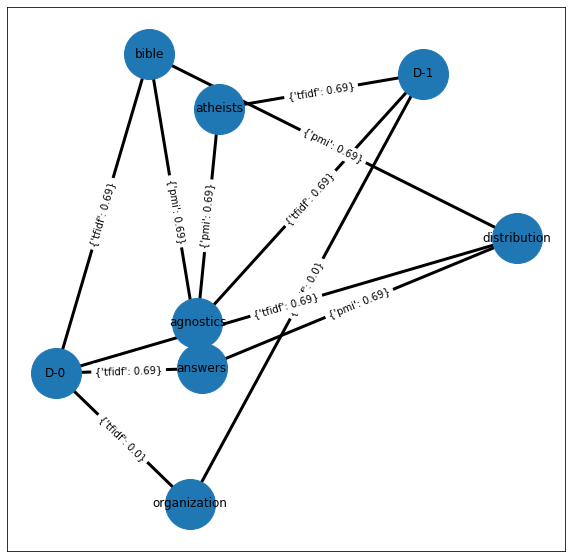

In [ ]:
options = {
    'node_color': 'tab:blue',
    'node_size': 2500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 8,

}

#pos = nx.spring_layout(graph)
pos = nx.random_layout(graph)
plt.figure(3,figsize=(10,10))

edge_labels = nx.get_edge_attributes(graph,'pmi')
nx.draw_networkx(graph, pos, **options)
nx.draw_networkx_edge_labels(graph, pos)
plt.show()


In [ ]:
def highlight_cols(s):
    color = 'blue'
    return 'color: %s' % color

A = nx.adjacency_matrix(graph, weight='pmi')
print(A.todense(), '\n\n\n\n')
df = nx.to_pandas_adjacency(graph)

for i in df.columns:
    try:
        df[[i]] = df[[i]].astype(float).astype(int)
    except:
        pass

df.style.applymap(highlight_cols)
df
#format_vertical_headers(df)

[[0.   0.   0.   1.   0.   1.   1.   0.  ]
 [0.   0.   0.69 0.   0.69 0.   0.   1.  ]
 [0.   0.69 0.   0.   0.69 0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.69 0.69 0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.69 0.  ]
 [1.   0.   0.   0.   0.   0.69 0.   0.  ]
 [0.   1.   1.   1.   1.   0.   0.   0.  ]] 






,D-1,bible,answers,organization,distribution,agnostics,atheists,D-0
D-1,0,0,0,1,0,1,1,0
bible,0,0,1,0,1,0,0,1
answers,0,1,0,0,1,0,0,1
organization,1,0,0,0,0,0,0,1
distribution,0,1,1,0,0,0,0,1
agnostics,1,0,0,0,0,0,1,0
atheists,1,0,0,0,0,1,0,0
D-0,0,1,1,1,1,0,0,0
